# YouTube Scraper

## Campaign Finance Group

### 1. Getting Project Dependecies

run **pip install -r requirements.txt** in your terminal

This installs pandas, numpy and [pytchat](https://pypi.org/project/pytchat/)

In [1]:
# uncomment and run to install packages
# !pip install pytchat
# !pip install pandas
# !pip install matplotlib
# !pip install pytchat

In [2]:
import pandas as pd
import pytchat
import matplotlib.pyplot as plt
import time
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))
from nltk.stem.snowball import SnowballStemmer
st = SnowballStemmer('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/zavalni1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def get_yt_data(chat,run_time=10, show_chat=True):
    """
    Takes in a chat instance and runtime and returns
    a dataframe with all chat data in that time
    
    :param chat: pychat instance
    :param run_time: int with total runtime
    :param show_chat: boolean telling chat to print or not
    :return: pandas dataframe
    """
    start_time = time.time()
    send_time = []
    name = []
    message = []
    while chat.is_alive():
        for c in chat.get().sync_items():
            send_time.append(c.datetime)
            name.append(c.author.name)
            message.append(c.message)
            
            if show_chat:
                print(f"{c.datetime} [{c.author.name}]- {c.message}")

            # TODO: Runtime is too small then assume an error?
            if time.time() - start_time >= run_time:
                return pd.DataFrame({'time':send_time,'name':name,'message':message})
def clean_data(df, col, clean_col):
    """
    removes stop words and tokenizes the words in each chat
    
    :param df: data frame
    :param col: name of column to parse
    :param clean_col: name of cleaned column
    :return: none
    """
    # change to lower and remove spaces on either side
    df[clean_col] = df[col].apply(lambda x: x.lower().strip())

    # remove extra spaces in between
    df[clean_col] = df[clean_col].apply(lambda x: re.sub(' +', ' ', x))

    # remove punctuation
    df[clean_col] = df[clean_col].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
    for i in range(len(df)):
        line = df[clean_col][i].split()
        line = [word for word in line if word not in stop_words]
        df[clean_col][i]=line
def word_counts(df,col):
    """
    visualizes most frequent words in dictionary
    
    :param df: data frame
    :param col: column of data frame
    :return: sorted dictionary of most frequent words
    """
    c = {}
    for i in range(len(df)):
        for word in df[col][i]:
            if word not in c:
                c[word]=1
            else:
                c[word]+=1
    return sorted(c.items(), key=lambda kv: kv[1])
def visualize_top_words(c,k):
    """
    visualizes most frequent words in dictionary
    
    :param c: dictionary with counts of words
    :param k: top k most frequent words to visualize
    :return: none
    """
    c = c[::-1]
    x= []
    y= []
    for i in range(k):
        x.append(c[i][0])
        y.append(c[i][1])
    plt.bar(x,y)
    
    

### 2. Scraping your YouTube data

- Copy the live YouTube link

- Make it a string and set it equal to the **yt_link** variable

- Run cell and get data

In [6]:
yt_link = "https://www.youtube.com/watch?v=LodADaKUWp8"
chat = pytchat.create(video_id=yt_link)
chat_data = get_yt_data(chat,360,False)
chat_data.head()

time            name                              message
0  2022-02-18 12:59:39  Nicole Pfeifer  no one give timmy money if hes late
1  2022-02-18 12:59:41   Trent Coleman                                 late
2  2022-02-18 12:59:43          SIXEYE                               LATE!!
3  2022-02-18 12:59:43       Christian                         Where is he 
4  2022-02-18 12:59:43  Nicole Pfeifer                                fired

In [7]:
clean_data(chat_data,"message","clean message")
chat_data

time            name                              message  \
0    2022-02-18 12:59:39  Nicole Pfeifer  no one give timmy money if hes late   
1    2022-02-18 12:59:41   Trent Coleman                                 late   
2    2022-02-18 12:59:43          SIXEYE                               LATE!!   
3    2022-02-18 12:59:43       Christian                         Where is he    
4    2022-02-18 12:59:43  Nicole Pfeifer                                fired   
..                   ...             ...                                  ...   
994  2022-02-18 13:05:33             jon                 o and e are switched   
995  2022-02-18 13:05:33  Rohan Vakharia                                RODEO   
996  2022-02-18 13:05:35           Maddy                                ORDER   
997  2022-02-18 13:05:35           LOGIC                                DODGE   
998  2022-02-18 13:05:36  Stephen Snyder                                  RAM   

                            clean message  
0    [one, give, timmy, money, hes, late]  
1                                  [late]  
2                                  [late]  
3                                      []  
4                                 [fired]  
..                                    ...  
994                         [e, switched]  
995                               [rodeo]  
996                               [order]  
997                               [dodge]  
998                                 [ram]  

[999 rows x 4 columns]

### 3. How can this be used?
- This could be used to scrape data from youtube channels that talk over relevant topics to see what this are being said the most in reference to a project.

- Seeing what users are most active

- Seeing what times are most active

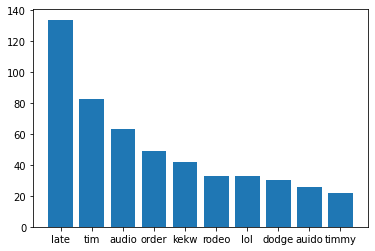

In [8]:
visualize_top_words(word_counts(chat_data,"clean message"),10)

### 4. References to libraries used

- [pytchat](https://pypi.org/project/pytchat/)

- [pandas](https://pandas.pydata.org/)

- [matplotlib](https://matplotlib.org/)

- [nltk](https://www.nltk.org/)